In [2]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd

# emb

In [11]:
# reload dataset
adata = sc.read_h5ad("/disk2/cai045/STATE/try/output/VEXAS_GMP.h5ad")

In [8]:
adata.obs

,barcode,celltype,group
barcode,,,
rd_Young1.All.T1_GAGGTGAGTACCGTTT-2,rd_Young1.All.T1_GAGGTGAGTACCGTTT-2,granulocyte monocyte progenitor cell,0
rd_Young2.All_TATAGCTCAACCTAAT-2,rd_Young2.All_TATAGCTCAACCTAAT-2,granulocyte monocyte progenitor cell,0
rd_Young1.All.T2_CTATTGAAGGCCCAGT-2,rd_Young1.All.T2_CTATTGAAGGCCCAGT-2,granulocyte monocyte progenitor cell,0
rd_Young1.All.T1_GATGCGACATGTCAAT-2,rd_Young1.All.T1_GATGCGACATGTCAAT-2,granulocyte monocyte progenitor cell,0
vx_PT9_BM_TGAGGGAAGATCCGAG.13,vx_PT9_BM_TGAGGGAAGATCCGAG.13,granulocyte monocyte progenitor cell,1
...,...,...,...
rd_Young1.All.T2_ACGAAGTCACCTGTAA-2,rd_Young1.All.T2_ACGAAGTCACCTGTAA-2,granulocyte monocyte progenitor cell,0
rd_Young2.All_AGCTTAATCCTTTACG-2,rd_Young2.All_AGCTTAATCCTTTACG-2,granulocyte monocyte progenitor cell,0
rd_Young2.All_TATGGGCGTATTGCAG-2,rd_Young2.All_TATGGGCGTATTGCAG-2,granulocyte monocyte progenitor cell,0


In [9]:
adata.obsm

AxisArrays with keys: X_pca, X_state, X_umap

**X_state 是 STATE 框架中 State Embedding Model (SE) 生成的细胞低维表示（通常为512或1024维向量）
维度：(n_cells, n_embedding_dim)**

In [12]:
adata.obsm["X_state"]

array([[ 0.01200488,  0.008386  , -0.00652152, ...,  0.07107838,
         0.08221457, -0.23509508],
       [ 0.01503221, -0.0007609 , -0.01546313, ...,  0.06518789,
         0.14006603, -0.26459792],
       [ 0.02259328,  0.00656221,  0.00754376, ...,  0.07905658,
         0.04085685, -0.19073023],
       ...,
       [ 0.02358026,  0.0086611 , -0.00159843, ...,  0.03383709,
         0.08414011, -0.24938536],
       [ 0.03246832, -0.02517024, -0.0141158 , ...,  0.06557781,
         0.03268718, -0.17594099],
       [-0.00294578, -0.01118754, -0.0355337 , ...,  0.09349703,
         0.11780611, -0.28642884]], dtype=float32)

In [13]:
print(adata.obsm["X_state"].shape)  # 应该是 (1423, 2058）
#所以是这个就是细胞嵌入矩阵  和输入的基因数量无关 只与模型的参数有关

(1423, 2058)


数据结构解读 

形状：(n_cells, embedding_dim)

每行对应一个细胞（如您数据中的1423个细胞）

每列代表嵌入空间的一个维度（通常512或1024维）

数值范围：浮点数（有正有负），表示细胞在潜在空间中的坐标

In [4]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
print(adata.X.shape)  # 应为 (n_cells, n_genes)
print(adata.obs['group'].nunique())  # 检查扰动类型数量

(1423, 36655)
2


# inference

In [3]:
adata = sc.read_h5ad("/disk2/cai045/STATE/try/output/VEXAS_GMP_infer.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 1423 × 2000
    obs: 'barcode', 'celltype', 'group'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'celltype_colors', 'hvg', 'neighbors', 'orig.ident_colors', 'pca', 'umap'
    obsm: 'X_pca', 'X_state', 'X_umap', 'model_preds'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

1. 检查数据是否包含多层信息（如基因表达的 layers）  
AnnData 对象可以存储不同层次的基因表达矩阵（例如原始计数、标准化数据、校正后的数据等）。

In [5]:
# 查看是否存在 layers
print(adata.layers.keys())

KeysView(Layers with keys: )


In [10]:
print(adata.X.shape)

(1423, 2000)


In [4]:
adata.obs

,barcode,celltype,group
barcode,,,
rd_Young1.All.T1_GAGGTGAGTACCGTTT-2,rd_Young1.All.T1_GAGGTGAGTACCGTTT-2,granulocyte monocyte progenitor cell,0
rd_Young2.All_TATAGCTCAACCTAAT-2,rd_Young2.All_TATAGCTCAACCTAAT-2,granulocyte monocyte progenitor cell,0
rd_Young1.All.T2_CTATTGAAGGCCCAGT-2,rd_Young1.All.T2_CTATTGAAGGCCCAGT-2,granulocyte monocyte progenitor cell,0
rd_Young1.All.T1_GATGCGACATGTCAAT-2,rd_Young1.All.T1_GATGCGACATGTCAAT-2,granulocyte monocyte progenitor cell,0
vx_PT9_BM_TGAGGGAAGATCCGAG.13,vx_PT9_BM_TGAGGGAAGATCCGAG.13,granulocyte monocyte progenitor cell,1
...,...,...,...
rd_Young1.All.T2_ACGAAGTCACCTGTAA-2,rd_Young1.All.T2_ACGAAGTCACCTGTAA-2,granulocyte monocyte progenitor cell,0
rd_Young2.All_AGCTTAATCCTTTACG-2,rd_Young2.All_AGCTTAATCCTTTACG-2,granulocyte monocyte progenitor cell,0
rd_Young2.All_TATGGGCGTATTGCAG-2,rd_Young2.All_TATGGGCGTATTGCAG-2,granulocyte monocyte progenitor cell,0


### 查看预测结果

In [5]:
adata.obsm

AxisArrays with keys: X_pca, X_state, X_umap, model_preds

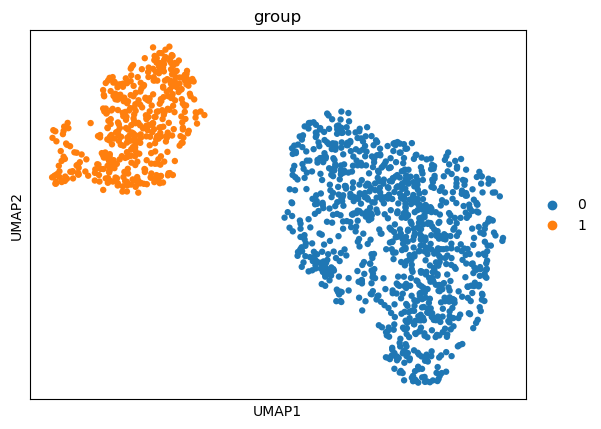

In [6]:
sc.pl.umap(adata, color='group')

In [10]:
#查看细胞嵌入矩阵
adata.obsm["model_preds"]

array([[0.        , 0.2646384 , 0.        , ..., 0.02891526, 0.6650972 ,
        0.        ],
       [0.        , 0.24725564, 0.        , ..., 0.43256742, 0.09143614,
        0.16788505],
       [0.528511  , 0.10884193, 0.        , ..., 0.5993409 , 0.578915  ,
        0.        ],
       ...,
       [0.        , 0.06415871, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3077739 , 0.22510633, 0.        , ..., 0.9262495 , 0.5146666 ,
        0.        ],
       [0.3913006 , 0.2889042 , 0.        , ..., 0.2919138 , 0.        ,
        0.        ]], dtype=float32)

In [9]:
print(adata.obsm["model_preds"].shape)  # 应该是 (1423, 2000）
#所以是这个就是干扰后的表达矩阵

(1423, 2000)


/disk2/cai045/anaconda3/envs/mellon/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


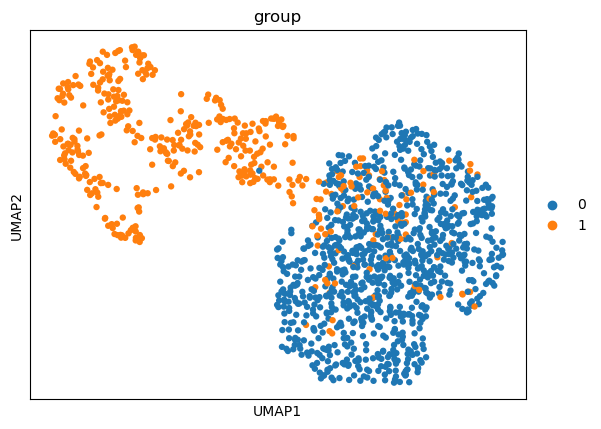

<Figure size 640x480 with 0 Axes>

In [11]:
#可视化预测结果
import matplotlib.pyplot as plt
sc.pp.neighbors(adata, use_rep='model_preds')
sc.tl.umap(adata)
sc.pl.umap(adata, color='group')
plt.savefig('prediction_umap.png')

**但是应该是数据里面的pert_col出了问题  我看了一下下载的ST模型  里面有专门的list 一定要按照里面的设置干扰**

比较一下两者的基因矩阵是否存在差别

In [6]:
# reload dataset
adata1 = sc.read_h5ad("/disk2/cai045/STATE/try/output/VEXAS_GMP.h5ad")

In [7]:
adata2 = sc.read_h5ad("/disk2/cai045/STATE/try/output/VEXAS_GMP_infer.h5ad")

In [8]:
#比较数值差异：(1) 整体差异

import numpy as np

# 假设已对齐基因和细胞
diff = adata1.X - adata2.X
print("最大绝对差异:", np.max(np.abs(diff)))
print("平均差异:", np.mean(diff))


最大绝对差异: 0.0
平均差异: 0.0
